In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
!gdown 1An6VbBVAQQPa-h0QkU81CGNelQLxFTBj

Downloading...
From: https://drive.google.com/uc?id=1An6VbBVAQQPa-h0QkU81CGNelQLxFTBj
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 89.7MB/s]


In [3]:
data=pd.read_csv('walmart_data.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


####Exploring Data

In [4]:
data.shape

(550068, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
data['Occupation'] = data['Occupation'].astype('object')
data['Marital_Status'] = data['Marital_Status'].astype('object')
data['Product_Category'] = data['Product_Category'].astype('object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [8]:
data.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [9]:
data.describe(include='object')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


In [10]:
data[data.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [11]:
data['User_ID'].nunique()

5891

In [12]:
data['Product_ID'].nunique()

3631

In [40]:
data['Gender'].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [14]:
data['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [15]:
data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [16]:
data['Stay_In_Current_City_Years'].value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

In [17]:
data['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [18]:
data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [19]:
data['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

##Observations:
- There are no null records or columns or duplicate records.
- The Purchase Amount columns seems likely to have outliers.
- In the whole dataset, we have 5891 and 3631 unique users and products respectively.
- On Checking value counts:
  
  - 75% of the users are Male and 25% are Female.
  - Approximately we have 75-80% users between age 18-50
  - We have 35 % of people staying in City from 1 year and 18% from 2 years
  - 60% of users are Single and 40% are Married.
  - We have 21 different Occupations and 20 different Product Categories in our dataset

##Understandig distribution of data via univariant

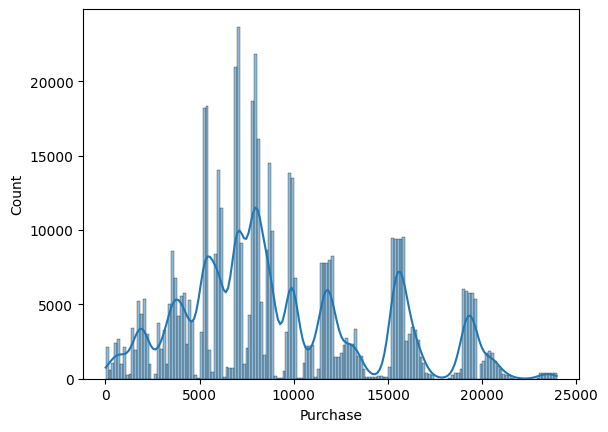

In [20]:
sns.histplot(data=data, x='Purchase', kde=True)
plt.show()

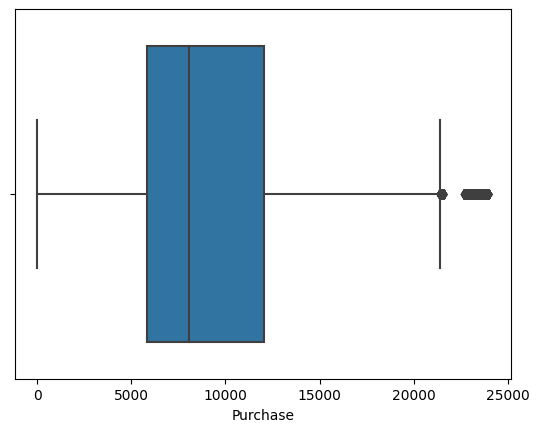

In [21]:
sns.boxplot(data=data, x='Purchase')
plt.show()

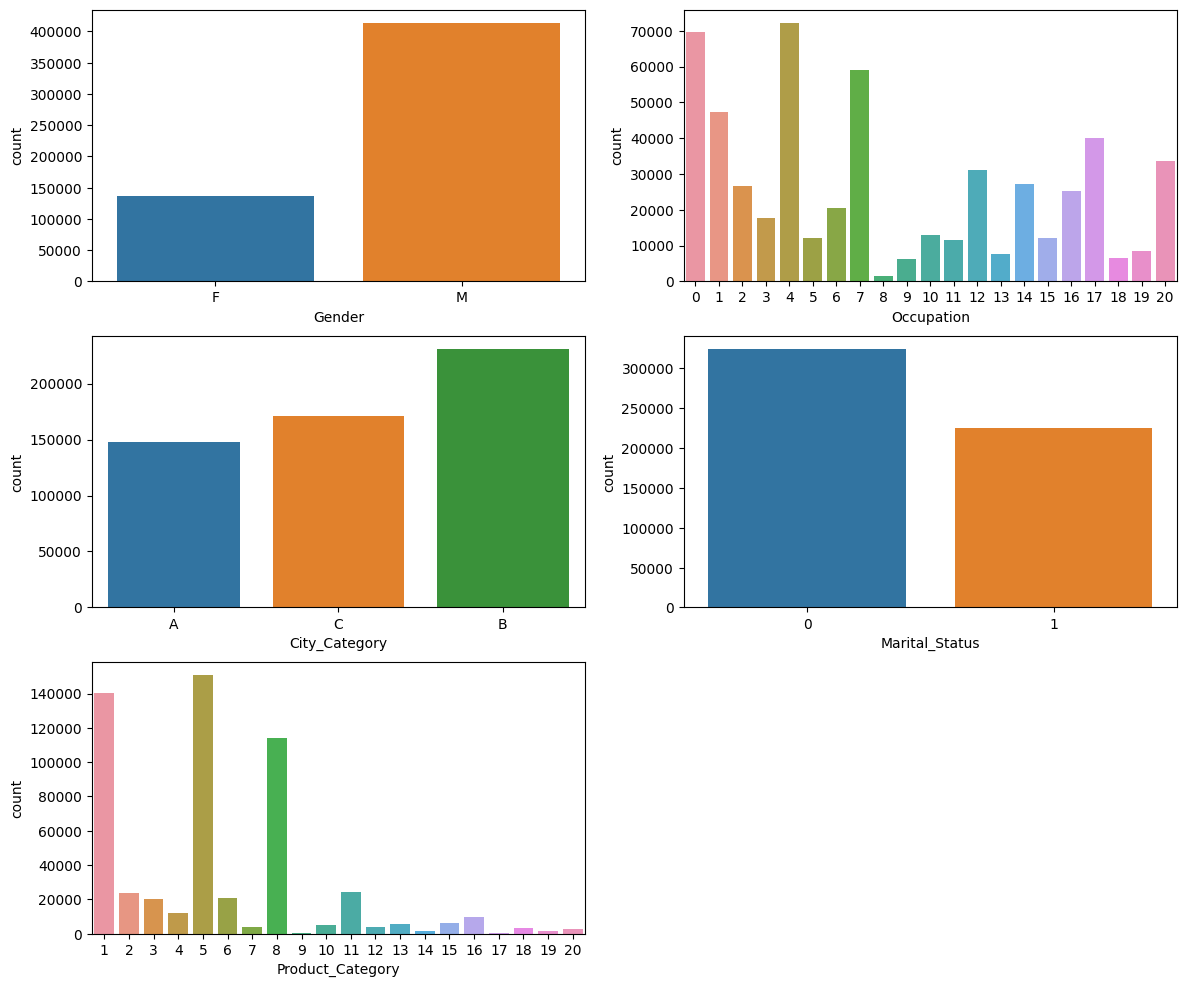

In [22]:
plt.figure(figsize=(14, 12))
plt.subplot(3,2,1)
sns.countplot(data=data, x='Gender')
plt.subplot(3,2,2)
sns.countplot(data=data, x='Occupation')
plt.subplot(3,2,3)
sns.countplot(data=data, x='City_Category')
plt.subplot(3,2,4)
sns.countplot(data=data, x='Marital_Status')
plt.subplot(3,2,5)
sns.countplot(data=data, x='Product_Category')
plt.show()

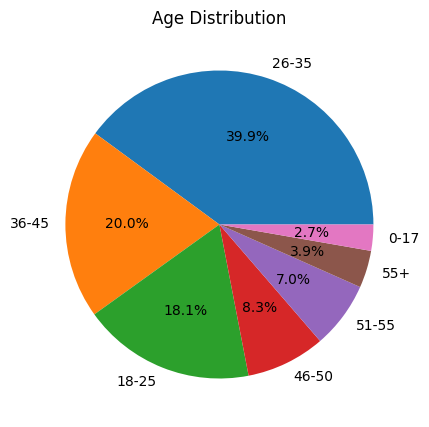

In [23]:
plt.figure(figsize=(7, 5))
plt.pie(data['Age'].value_counts(), labels=data['Age'].value_counts().index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

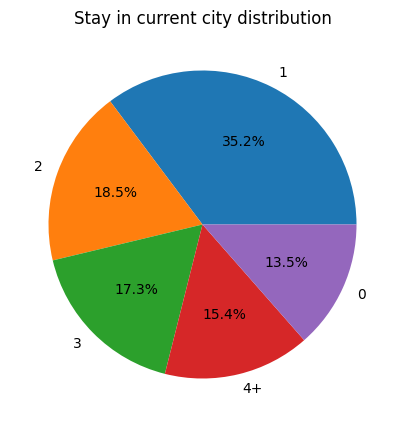

In [24]:
plt.figure(figsize=(7, 5))
plt.pie(data['Stay_In_Current_City_Years'].value_counts(), labels=data['Stay_In_Current_City_Years'].value_counts().index, autopct='%1.1f%%')
plt.title('Stay in current city distribution')
plt.show()

In [132]:
# Average amount spent by each city
city_df=data.groupby(['User_ID','City_Category'])['Purchase'].sum().reset_index()
cities=city_df['City_Category'].unique()
for city in cities:
  mean=city_df[city_df['City_Category']==city]['Purchase'].mean()
  print('Average amount City ',city,' spents is ',mean)

Average amount City  A  spents is  1259781.4937799042
Average amount City  C  spents is  530043.7961134119
Average amount City  B  spents is  1239328.4153485647


Amount spent by Male & Female Customers

In [25]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [28]:
amt_spent=data.groupby(['User_ID','Gender'])['Purchase'].sum().reset_index()
amt_spent

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [38]:
amt_spent['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [46]:
male_avg = amt_spent[amt_spent['Gender']=='M']['Purchase'].mean()
female_avg = amt_spent[amt_spent['Gender']=='F']['Purchase'].mean()
print('Avg of Male customer''s purchases:'+ np.round(male_avg,4).astype('str'))
print('Avg of Female customer''s purchases:'+ np.round(female_avg,4).astype('str'))

Avg of Male customers purchases:925344.4024
Avg of Female customers purchases:712024.395


##Observation:
- On Average it is observed the male customers spent more than female customers.

##Calculating mean of sample means to see distribution based on Males and Females

In [48]:
male_df=amt_spent[amt_spent['Gender']=='M']
female_df=amt_spent[amt_spent['Gender']=='F']

,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490


In [50]:
male_df.head()

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668


In [49]:
female_df.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490


In [51]:
#Sample mean for male and female
male_avg, female_avg

(925344.4023668639, 712024.3949579832)

In [52]:
# CHecking Distribution for male and female by taking sample of 200 each for 1000 times
male_sample_mean_200=[np.mean(male_df.sample(200)['Purchase']) for i in range(1000)]
female_sample_mean_200=[np.mean(female_df.sample(200)['Purchase']) for i in range(1000)]

np.mean(male_sample_mean_200),np.mean(female_sample_mean_200)

(920979.396515, 709472.8019)

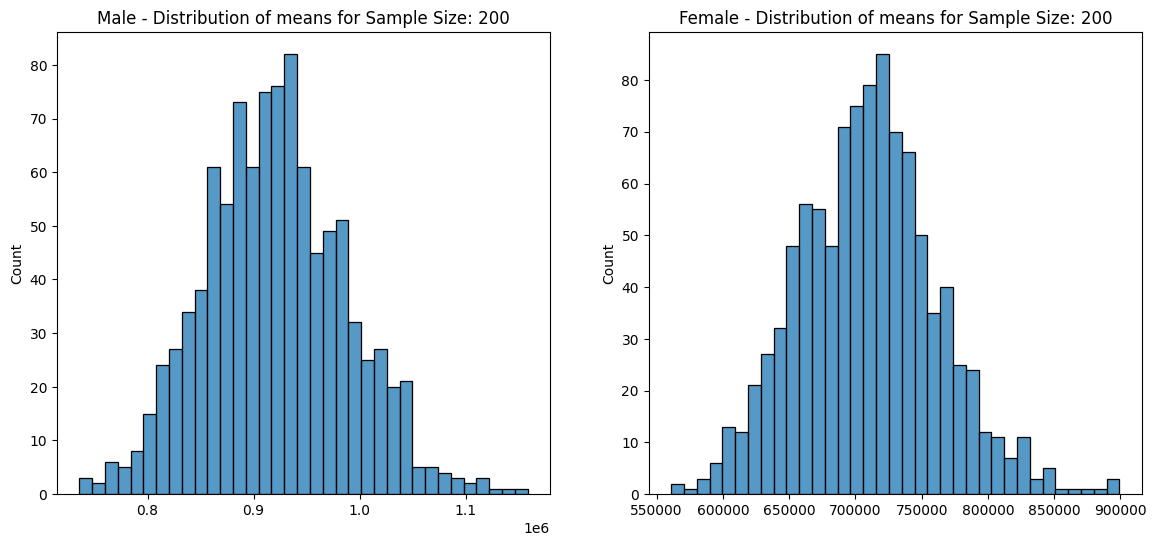

In [68]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.histplot(male_sample_mean_200,bins=35)
plt.title("Male - Distribution of means for Sample Size: 200")
plt.subplot(1,2,2)
sns.histplot(female_sample_mean_200,bins=35)
plt.title("Female - Distribution of means for Sample Size: 200")
plt.show()

In [67]:
# CHecking Distribution for male and female by taking sample of 2000 each for 1000 times
male_sample_mean_2000=[np.mean(male_df.sample(2000,replace=True)['Purchase']) for i in range(1000)]
female_sample_mean_2000=[np.mean(female_df.sample(2000,replace=True)['Purchase']) for i in range(1000)]

np.mean(male_sample_mean_2000),np.mean(female_sample_mean_2000)

(925162.2165715, 712214.1610209999)

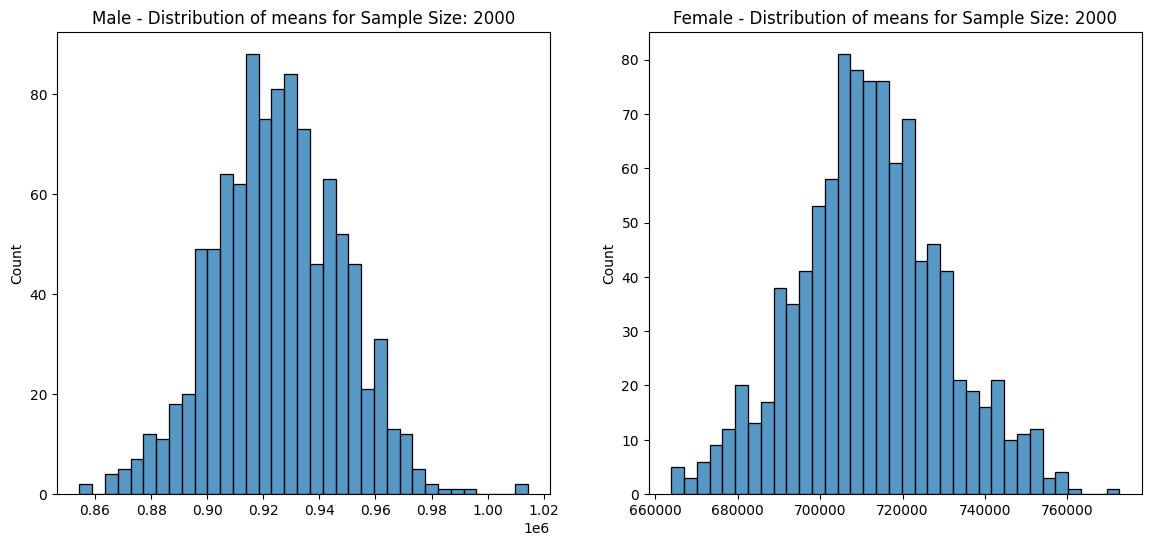

In [69]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.histplot(male_sample_mean_2000,bins=35)
plt.title("Male - Distribution of means for Sample Size: 2000")
plt.subplot(1,2,2)
sns.histplot(female_sample_mean_2000,bins=35)
plt.title("Female - Distribution of means for Sample Size: 2000")
plt.show()

In [134]:
print("Mean of 200 sample means of amount spend for Male: {:.2f}".format(np.mean(male_sample_mean_200)))
print("Mean of 200 sample means of amount spend for Female: {:.2f}".format(np.mean(female_sample_mean_200)))

print("\nMean of 2000 sample means of amount spend for Male: {:.2f}".format(np.mean(male_sample_mean_2000)))
print("Mean of 2000 sample means of amount spend for Female: {:.2f}".format(np.mean(female_sample_mean_2000)))

print("\nMale - Sample mean: {:.2f}; Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f}; Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))


Mean of 200 sample means of amount spend for Male: 920979.40
Mean of 200 sample means of amount spend for Female: 709472.80

Mean of 2000 sample means of amount spend for Male: 925162.22
Mean of 2000 sample means of amount spend for Female: 712214.16

Male - Sample mean: 925344.40; Sample std: 985830.10
Female - Sample mean: 712024.39; Sample std: 807370.73


##Observation

Now using the Central Limit Theorem for the population we can say that the dataset follows a Normal Distribution (Gaussian), so we can infer that for Population mean would be(approx):

1. Average amount spend by male customers is 9,25,162.22
2. Average amount spend by female customers is 7,12,214.16

##Calculating CI for both Male and Female

In [86]:
male_sample_mean=male_df['Purchase'].mean()
female_sample_mean=female_df['Purchase'].mean()

In [89]:
male_lower_interval = male_sample_mean + norm.ppf(0.025) * (male_df['Purchase'].std()/(np.sqrt(len(male_df))))
male_upper_interval = male_sample_mean + norm.ppf(0.975) * (male_df['Purchase'].std()/(np.sqrt(len(male_df))))

female_lower_interval = female_sample_mean + norm.ppf(0.025) * (female_df['Purchase'].std()/(np.sqrt(len(female_df))))
female_upper_interval = female_sample_mean + norm.ppf(0.975) * (female_df['Purchase'].std()/(np.sqrt(len(female_df))))

In [90]:
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_interval, male_upper_interval))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_interval, female_upper_interval))

Male confidence interval of means: (895618.38, 955070.43)
Female confidence interval of means: (673255.48, 750793.30)


Now we can infer about the population that, 95% of the times (CI being 95 %):

1. Average amount spend by male customer lies in between: (895618.38, 955070.43)
2. Average amount spend by female customer lies in between: (673255.48, 750793.30)


##Calculating mean of sample means to see distribution based on Married/Unmarried

In [92]:
amt_spent

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [96]:
amt_spent=data.groupby(['User_ID','Marital_Status'])['Purchase'].sum().reset_index()
amt_spent

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [98]:
amt_spent['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [100]:
married_df=amt_spent[amt_spent['Marital_Status']==1]
unmarried_df=amt_spent[amt_spent['Marital_Status']==0]

In [102]:
# CHecking Distribution for married and Unmarried by taking sample of 2000 each for 1000 times
married_sample_mean_2000=[np.mean(married_df.sample(2000,replace=True)['Purchase']) for i in range(1000)]
unmarried_sample_mean_2000=[np.mean(unmarried_df.sample(2000,replace=True)['Purchase']) for i in range(1000)]

married_means=np.mean(married_sample_mean_2000)
unmarried_means=np.mean(unmarried_sample_mean_2000)

print("Population Mean of amount spend by Married customer(approx): {:.2f}".format(married_means))
print("Population Mean of amount spend by Unmarried customer(approx): {:.2f}".format(unmarried_means))

print("\nMale - Sample mean: {:.2f}".format(married_df['Purchase'].mean()))
print("Female - Sample mean: {:.2f}".format(married_df['Purchase'].mean()))

Population Mean of amount spend by Married customer(approx): 843443.15
Population Mean of amount spend by Unmarried customer(approx): 880633.53

Male - Sample mean: 843526.80
Female - Sample mean: 843526.80


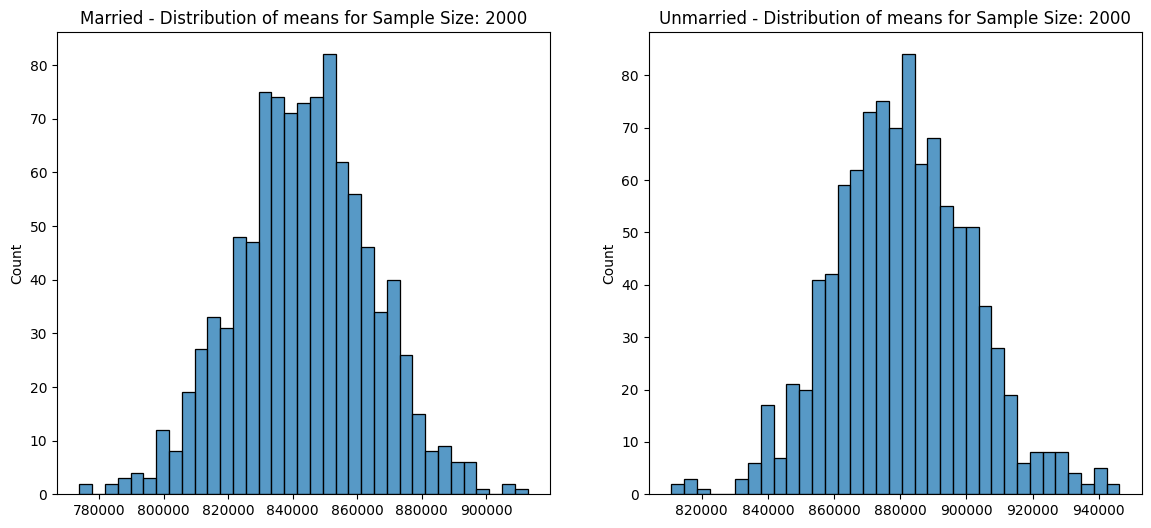

In [104]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.histplot(married_sample_mean_2000,bins=35)
plt.title("Married - Distribution of means for Sample Size: 2000")
plt.subplot(1,2,2)
sns.histplot(unmarried_sample_mean_2000,bins=35)
plt.title("Unmarried - Distribution of means for Sample Size: 2000")
plt.show()

In [105]:
#calculating CI
married_sample_mean=married_df['Purchase'].mean()
unmarried_sample_mean=unmarried_df['Purchase'].mean()

In [126]:
married_lower_interval = married_sample_mean + norm.ppf(0.025) * (married_df['Purchase'].std()/(np.sqrt(len(married_df))))
married_upper_interval = married_sample_mean + norm.ppf(0.975) * (married_df['Purchase'].std()/(np.sqrt(len(married_df))))

unmarried_lower_interval = unmarried_sample_mean + norm.ppf(0.025) * (unmarried_df['Purchase'].std()/(np.sqrt(len(unmarried_df))))
unmarried_upper_interval = unmarried_sample_mean + norm.ppf(0.975) * (unmarried_df['Purchase'].std()/(np.sqrt(len(unmarried_df))))

print("Married confidence interval of means: ({:.2f}, {:.2f})".format(married_lower_interval, married_upper_interval))
print("Unmarried confidence interval of means: ({:.2f}, {:.2f})".format(unmarried_lower_interval, unmarried_upper_interval))

Married confidence interval of means: (806669.51, 880384.08)
Unmarried confidence interval of means: (848741.77, 912409.80)


##Doing the same again for Age Groups : Calculating mean of sample means to see distribution based on Married/Unmarried

In [107]:
amt_spent=data.groupby(['User_ID','Age'])['Purchase'].sum().reset_index()
amt_spent

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [110]:
age_groups = amt_spent['Age'].unique()
age_groups

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [118]:
for age in age_groups:
  temp_mean=[np.mean(amt_spent[amt_spent['Age']==age].sample(2000,replace=True)['Purchase']) for i in range(1000)]
  print('Age Group: ',age,' has population mean of approx: ',np.mean(temp_mean))

Age Group:  0-17  has population mean of approx:  618624.5600195
Age Group:  55+  has population mean of approx:  539574.433186
Age Group:  26-35  has population mean of approx:  990846.2798654999
Age Group:  46-50  has population mean of approx:  791365.644799
Age Group:  51-55  has population mean of approx:  763738.2194645
Age Group:  36-45  has population mean of approx:  879688.602883
Age Group:  18-25  has population mean of approx:  855415.3350045


In [125]:
#Calculating CI for 95%
for age in age_groups:
  temp_df=amt_spent[amt_spent['Age']==age]
  sample_mean=temp_df['Purchase'].mean()
  lower_limit = sample_mean + norm.ppf(0.025) * (temp_df['Purchase'].std()/(np.sqrt(len(temp_df))))
  upper_limit = sample_mean + norm.ppf(0.975) * (temp_df['Purchase'].std()/(np.sqrt(len(temp_df))))

  print('For age: ',age,' --> confidence interval of means:',np.round(lower_limit,2),',',np.round(upper_limit,2))

For age:  0-17  --> confidence interval of means: 527664.13 , 710071.49
For age:  55+  --> confidence interval of means: 476949.41 , 602445.08
For age:  26-35  --> confidence interval of means: 945035.24 , 1034283.39
For age:  46-50  --> confidence interval of means: 713507.09 , 871590.48
For age:  51-55  --> confidence interval of means: 692393.73 , 834008.12
For age:  36-45  --> confidence interval of means: 823348.84 , 935982.58
For age:  18-25  --> confidence interval of means: 801633.75 , 908092.49


##Insights:
  - 75% of the users are Male and 25% are Female.
  - Approximately we have 75-80% users between age 18-50
  - We have 35 % of people staying in City from 1 year and 18% from 2 years
  - 60% of users are Single and 40% are Married.
  - We have 21 different Occupations and 20 different Product Categories in our dataset
  - More users belong to B City_Category
  - Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

Average amount spend by male customers is **925162.22**

Average amount spend by female customers is **712214.16**

###Confidence Interval
- By Gender:
  - Average amount spend by male customer lies in between: **(895618.38, 955070.43)**
  - Average amount spend by female customer lies in between: **(673255.48, 750793.30)**
- By Marital Status:
  - **Married** confidence interval of means: **(806669.51, 880384.08)**
  - **Unmarried** confidence interval of means: **(848741.77, 912409.80)**
- By Age:
  - For age:  **0-17**  --> confidence interval of means: (527664.13 , 710071.49)
  - For age:  **55+**  --> confidence interval of means: (476949.41 , 602445.08)
  - For age:  **26-35**  --> confidence interval of means: (945035.24 , 1034283.39)
  - For age:  **46-50**  --> confidence interval of means: (713507.09 , 871590.48)
  - For age:  **51-55**  --> confidence interval of means: (692393.73 , 834008.12)
  - For age:  **36-45**  --> confidence interval of means: (823348.84 , 935982.58)
  - For age:  **18-25**  --> confidence interval of means: (801633.75 , 908092.49)

##Recommendations:
- Men spent more money then women, hence company can focus more on selling more products for men and keep retaining their male customers.
- Customers in City A spent more compared to city B and C, hence expaning stores and sales in city C would be profitable.
- Product_category - 1, 5, 8 are the products purchased more frequently. This clearly means that these products are more liked by the customers. Keeping extra stocks for these products is recommended.
- Unmarried customers tends to spend more than the married customers. So company can keep offers and discounts to attract more of unmarried customers.
- Customers from age group 26-35 have been spending more money than other age groups. Company can focuss more on these age grouped customers
